<a href="https://colab.research.google.com/github/laveena01/MDM-in-RS/blob/apriori/ENSEMBLE_BOXES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import glob
import pandas as pd

In [ ]:
df = pd.DataFrame(columns= ["img", "x1", "y1", "x2", "y2", "confidence"])
for file in glob.glob('/content/drive/MyDrive/wsadd_labels1/*'):
  with open(file) as f:
    for i in f.readlines():
      l = i.split()
      x = float(l[1])
      y = float(l[2])
      w = float(l[3])
      h = float(l[4])
      l[1] = x - w/2
      l[2] = y - h/2
      l[3] = x + w/2
      l[4] = y + h/2
      l[0] = file.split('/')[-1].replace("txt", "jpg")
      df = df.append(pd.Series(l, index = ["img", "x1", "y1", "x2", "y2", "confidence"]), ignore_index = True)

<ipython-input-26-7d30e93ab1d6>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(l, index = ["img", "x1", "y1", "x2", "y2", "confidence"]), ignore_index = True)
<ipython-input-26-7d30e93ab1d6>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(l, index = ["img", "x1", "y1", "x2", "y2", "confidence"]), ignore_index = True)
<ipython-input-26-7d30e93ab1d6>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(l, index = ["img", "x1", "y1", "x2", "y2", "confidence"]), ignore_index = True)
<ipython-input-26-7d30e93ab1d6>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  d

In [ ]:
df.to_csv("yolo.csv" ,index=False)

In [ ]:
! cp "yolo.csv" "/content/drive/MyDrive/final_ensemble"

In [ ]:
yolo = pd.read_csv("yolo.csv")
_34 = pd.read_csv("/content/drive/MyDrive/final_ensemble/cbaml1.csv")

In [ ]:
img = yolo["img"].unique()
img

array(['1_101.jpg', '1_105.jpg', '1_102.jpg', '1_112.jpg', '1_121.jpg',
       '1_114.jpg', '1_122.jpg', '1_127.jpg', '1_124.jpg', '1_134.jpg',
       '1_133.jpg', '1_135.jpg', '1_130.jpg', '1_131.jpg', '1_129.jpg',
       '1_144.jpg', '1_139.jpg', '1_140.jpg', '1_143.jpg', '1_142.jpg',
       '1_150.jpg', '1_147.jpg', '1_151.jpg', '1_152.jpg', '1_158.jpg',
       '1_153.jpg', '1_154.jpg', '1_157.jpg', '1_159.jpg', '1_156.jpg',
       '1_167.jpg', '1_168.jpg', '1_164.jpg', '1_165.jpg', '1_166.jpg',
       '1_171.jpg', '1_172.jpg', '1_173.jpg', '1_169.jpg', '1_170.jpg',
       '1_180.jpg', '1_181.jpg', '1_177.jpg', '1_185.jpg', '1_183.jpg',
       '1_178.jpg', '1_182.jpg', '1_184.jpg', '1_186.jpg', '1_190.jpg',
       '1_191.jpg', '1_193.jpg', '1_192.jpg', '1_195.jpg', '1_198.jpg',
       '1_85.jpg', '1_86.jpg', '1_9.jpg', '1_95.jpg', '1_87.jpg',
       '1_98.jpg', '1_94.jpg', '1_99.jpg', '1_93.jpg', '1_91.jpg',
       '1_16.jpg', '1_15.jpg', '1_31.jpg', '1_20.jpg', '1_14.jpg',
       '

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

def show(img, boxes):
  org_img = cv2.imread(f'/content/drive/MyDrive/data/YOLO/yolo_test/{img}')
  h, w, d = org_img.shape
  for c in boxes:
    cv2.rectangle(org_img, (int(c[0] * h), int(c[1] * w)), (int(c[2] * h), int(c[3] * w)), (0,0,255), 2)
  cv2_imshow(org_img)

In [ ]:
!pip install ensemble-boxes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.DataFrame(columns= ["img", "x1", "y1", "x2", "y2"])

for i in img:
  yolo_r = yolo[yolo["img"] == i]
  _34_r = _34[_34["img"] == i]
  k = 0
  boxes_list = [[],[]]
  scores_list = [[], []]
  labels_list = [[], []]
  for i,r in yolo_r.iterrows():
    boxes_list[0].append([r.x1, r.y1, r.x2, r.y2])
    scores_list[0].append(r.confidence)
    labels_list[0].append(1)
    k = r.img
  for i,r in _34_r.iterrows():
    boxes_list[1].append([r.x1, r.y1, r.x2, r.y2])
    scores_list[1].append(r.confidence)
    labels_list[1].append(1)
  # weights = [1, 0.5]
    weights = [2, 0.5]
  iou_thr = 0.5
  skip_box_thr = 0.01
  sigma = 0.5

  from ensemble_boxes import *

  boxes1, scores1, labels1 = nms(boxes_list, scores_list, labels_list, weights=weights, iou_thr=iou_thr)
  boxes2, scores2, labels2 = soft_nms(boxes_list, scores_list, labels_list, weights=weights, iou_thr=iou_thr, sigma=sigma, thresh=skip_box_thr)
  boxes3, scores3, labels3 = non_maximum_weighted(boxes_list, scores_list, labels_list, weights=weights, iou_thr=iou_thr, skip_box_thr=skip_box_thr)
  boxes4, scores4, labels4 = weighted_boxes_fusion(boxes_list, scores_list, labels_list, weights=weights, iou_thr=iou_thr, skip_box_thr=skip_box_thr)

  # show(k, boxes4)
  # break
  for b in boxes1:
    c = [k]
    for _ in b:
      c.append(_)
    df = df.append(pd.Series(c, index = ["img", "x1", "y1", "x2", "y2"]),
                     ignore_index = True)


<ipython-input-44-9eb9c0cc2f92>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(c, index = ["img", "x1", "y1", "x2", "y2"]),
<ipython-input-44-9eb9c0cc2f92>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(c, index = ["img", "x1", "y1", "x2", "y2"]),
<ipython-input-44-9eb9c0cc2f92>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(c, index = ["img", "x1", "y1", "x2", "y2"]),
<ipython-input-44-9eb9c0cc2f92>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(c, index = ["img", "x1", "y1", "x2", "y2"]),
<ipython-input-44-9eb9c0cc2f92>:38: 

Warning. Fixed 2 boxes coordinates > 1. Check that your boxes was normalized at [0, 1]
Warning. Fixed 2 boxes coordinates > 1. Check that your boxes was normalized at [0, 1]


<ipython-input-44-9eb9c0cc2f92>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(c, index = ["img", "x1", "y1", "x2", "y2"]),
<ipython-input-44-9eb9c0cc2f92>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(c, index = ["img", "x1", "y1", "x2", "y2"]),
<ipython-input-44-9eb9c0cc2f92>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(c, index = ["img", "x1", "y1", "x2", "y2"]),
<ipython-input-44-9eb9c0cc2f92>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(c, index = ["img", "x1", "y1", "x2", "y2"]),
<ipython-input-44-9eb9c0cc2f92>:38: 

Warning. Fixed 1 boxes coordinates < 0
Warning. Fixed 1 boxes coordinates < 0


<ipython-input-44-9eb9c0cc2f92>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(c, index = ["img", "x1", "y1", "x2", "y2"]),
<ipython-input-44-9eb9c0cc2f92>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(c, index = ["img", "x1", "y1", "x2", "y2"]),
<ipython-input-44-9eb9c0cc2f92>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(c, index = ["img", "x1", "y1", "x2", "y2"]),
<ipython-input-44-9eb9c0cc2f92>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(c, index = ["img", "x1", "y1", "x2", "y2"]),
<ipython-input-44-9eb9c0cc2f92>:38: 

In [ ]:
df

,img,x1,y1,x2,y2
0,1_101.jpg,0.757767,0.289949,0.880607,0.398499
1,1_105.jpg,0.810667,0.116716,0.914839,0.214027
2,1_105.jpg,0.218241,0.136070,0.302055,0.223150
3,1_105.jpg,0.632206,0.598639,0.723794,0.688617
4,1_105.jpg,0.034667,0.109479,0.120000,0.194927
...,...,...,...,...,...
273,1_198.jpg,0.584521,0.708163,0.702648,0.932653
274,1_198.jpg,0.329939,0.689796,0.490835,0.912245
275,1_198.jpg,0.949084,0.000000,1.000000,0.038776
276,1_198.jpg,0.763747,0.000000,0.916497,0.179592


In [ ]:
df.to_csv("/content/drive/MyDrive/final_ensemble/ecbaml3_wb.csv")

In [ ]:
print(boxes_list)
print(scores_list)
print(labels_list)

[[[0.442187, 0.185938, 0.594531, 0.35]], [[0.401960784, 0.435207824, 0.612745098, 0.60391198], [0.448529412, 0.195599022, 0.610294118, 0.339853301]]]
[array([0.273408]), array([0.70111111, 0.70111111])]
[[1], [1, 1]]


In [ ]:
from ensemble_boxes import *


weights = [1, 0.5]

iou_thr = 0.5
skip_box_thr = 0.01
sigma = 0.5

boxes1, scores1, labels1 = nms(boxes_list, scores_list, labels_list, weights=weights, iou_thr=iou_thr)
boxes2, scores2, labels2 = soft_nms(boxes_list, scores_list, labels_list, weights=weights, iou_thr=iou_thr, sigma=sigma, thresh=skip_box_thr)
boxes3, scores3, labels3 = non_maximum_weighted(boxes_list, scores_list, labels_list, weights=weights, iou_thr=iou_thr, skip_box_thr=skip_box_thr)
boxes4, scores4, labels4 = weighted_boxes_fusion(boxes_list, scores_list, labels_list, weights=weights, iou_thr=iou_thr, skip_box_thr=skip_box_thr)

In [ ]:
boxes4

array([[0.71478289, 0.60199374, 0.83409768, 0.74532181]])

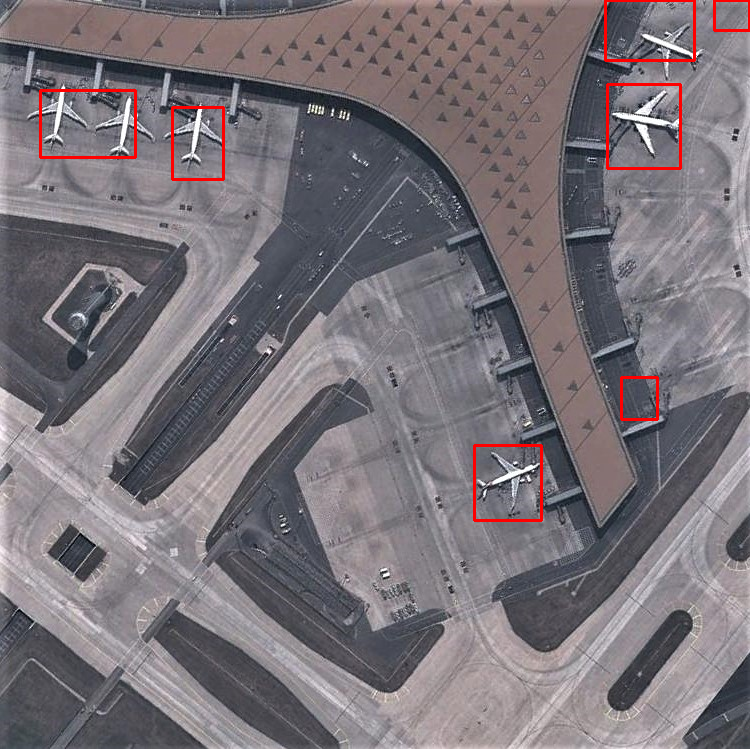

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
org_img = cv2.imread('/content/drive/MyDrive/data/YOLO/yolo_test/1_12.jpg')
h, w, d = org_img.shape
for _,c in _34[_34["img"] == "1_12.jpg"].iterrows():
  cv2.rectangle(org_img, (int(c.x1 * h), int(c.y1 * w)), (int(c.x2 * h), int(c.y2 * w)), (0,0,255), 2)
cv2_imshow(org_img)

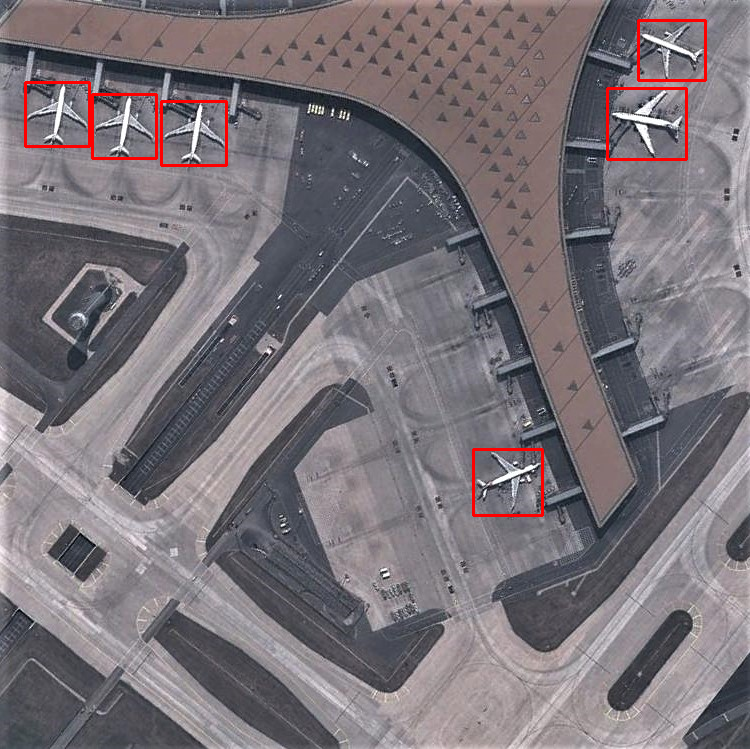

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
org_img = cv2.imread('/content/drive/MyDrive/data/YOLO/yolo_test/1_12.jpg')
h, w, d = org_img.shape
for _,c in yolo[yolo["img"] == "1_12.jpg"].iterrows():
  cv2.rectangle(org_img, (int(c.x1 * h), int(c.y1 * w)), (int(c.x2 * h), int(c.y2 * w)), (0,0,255), 2)
cv2_imshow(org_img)

# CBAM with hfrsol

In [ ]:
_34 = pd.read_csv("/content/drive/MyDrive/ensemble/34.csv")
cbam = pd.read_csv("/content/drive/MyDrive/ensemble/cbam_bbox_modif_wsaddr_[4]_[0.02].csv")

In [ ]:
!pip install ensemble-boxes

In [ ]:
df = pd.DataFrame(columns= ["img", "x1", "y1", "x2", "y2"])

for i in img:
  cbam_r = cbam[cbam["img"] == i]
  _34_r = _34[_34["img"] == i]
  k = 0
  boxes_list = [[],[]]
  scores_list = [[], []]
  labels_list = [[], []]
  for i,r in yolo_r.iterrows():
    boxes_list[0].append([r.x1, r.y1, r.x2, r.y2])
    scores_list[0].append(r.confidence)
    labels_list[0].append(1)
    k = r.img
  for i,r in _34_r.iterrows():
    boxes_list[1].append([r.x1, r.y1, r.x2, r.y2])
    scores_list[1].append(r.confidence)
    labels_list[1].append(1)
  weights = [1, 0.5]

  iou_thr = 0.5
  skip_box_thr = 0.01
  sigma = 0.5

  from ensemble_boxes import *

  boxes1, scores1, labels1 = nms(boxes_list, scores_list, labels_list, weights=weights, iou_thr=iou_thr)
  boxes2, scores2, labels2 = soft_nms(boxes_list, scores_list, labels_list, weights=weights, iou_thr=iou_thr, sigma=sigma, thresh=skip_box_thr)
  boxes3, scores3, labels3 = non_maximum_weighted(boxes_list, scores_list, labels_list, weights=weights, iou_thr=iou_thr, skip_box_thr=skip_box_thr)
  boxes4, scores4, labels4 = weighted_boxes_fusion(boxes_list, scores_list, labels_list, weights=weights, iou_thr=iou_thr, skip_box_thr=skip_box_thr)

  # show(k, boxes4)
  # break
  for b in boxes1:
    c = [k]
    for _ in b:
      c.append(_)
    df = df.append(pd.Series(c, index = ["img", "x1", "y1", "x2", "y2"]),
                     ignore_index = True)


<ipython-input-41-ff346e6f1ee8>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(c, index = ["img", "x1", "y1", "x2", "y2"]),
<ipython-input-41-ff346e6f1ee8>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(c, index = ["img", "x1", "y1", "x2", "y2"]),
<ipython-input-41-ff346e6f1ee8>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(c, index = ["img", "x1", "y1", "x2", "y2"]),
<ipython-input-41-ff346e6f1ee8>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(c, index = ["img", "x1", "y1", "x2", "y2"]),
<ipython-input-41-ff346e6f1ee8>:38: 

In [ ]:
df.to_csv("/content/drive/MyDrive/ensemble/ensemble_cbam_hfrsol.csv")